In [1]:
!nvidia-smi 

Thu Feb 17 07:29:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-17 07:29:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-17 07:29:42 (130 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow Datasets to Download Data

In [4]:
2+3

5

In [5]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [6]:
# List all avail datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) #is our target dataset in the list of TFDS datasets?

True


In [7]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, # data gets returned in tuple (data, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteA59C40/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteA59C40/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [8]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [9]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the Food101 from TFDS

In [10]:
# Take one sample of the train data
train_one_sample = train_data.take(1)

In [11]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (489, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 90
  Class name (str form): spaghetti_bolognese
  


In [13]:
# What does our image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(489, 512, 3), dtype=uint8, numpy=
array([[[ 83,  71,  45],
        [ 81,  69,  43],
        [ 80,  68,  44],
        ...,
        [186, 183, 142],
        [188, 185, 144],
        [185, 182, 141]],

       [[ 86,  74,  48],
        [ 83,  71,  45],
        [ 82,  70,  46],
        ...,
        [180, 177, 136],
        [179, 176, 135],
        [182, 179, 138]],

       [[ 88,  76,  52],
        [ 87,  75,  51],
        [ 85,  73,  49],
        ...,
        [188, 185, 144],
        [186, 183, 142],
        [187, 184, 143]],

       ...,

       [[162, 163, 168],
        [164, 165, 170],
        [171, 170, 176],
        ...,
        [ 75,  74,  56],
        [ 67,  66,  48],
        [ 64,  63,  45]],

       [[168, 169, 174],
        [175, 176, 181],
        [167, 166, 172],
        ...,
        [ 79,  78,  60],
        [ 74,  73,  55],
        [ 79,  78,  60]],

       [[182, 183, 188],
        [178, 179, 184],
        [163, 164, 169],
        ...,
        [ 75,  74,  5

In [14]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

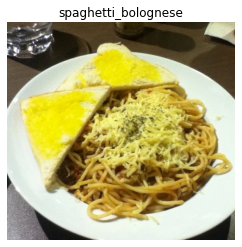

In [15]:
# Plot an image tensor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## Create preprocessing functions for our data

In [16]:
# Make a function for preproccessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype uint8 -> float32 and reshapes image
  to [img_shape, img_shape, color]
  """
  image = tf.image.resize(image, [img_shape, img_shape])
  # image = image/255. #scale image values but not required for EfficientNetBX models from tf.keras.applications
  return tf.cast(image, tf.float32), label

In [17]:
# Preprocess a single image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}..., \nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}\n")

Image before preprocessing:
 [[[ 83  71  45]
  [ 81  69  43]
  [ 80  68  44]
  ...
  [186 183 142]
  [188 185 144]
  [185 182 141]]

 [[ 86  74  48]
  [ 83  71  45]
  [ 82  70  46]
  ...
  [180 177 136]
  [179 176 135]
  [182 179 138]]]..., 
Shape: (489, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 83.108574  71.108574  45.108578]
  [ 82.11161   70.11161   46.11161 ]
  [ 84.873245  72.873245  49.30182 ]
  ...
  [191.5464   188.5464   147.5464  ]
  [184.01991  181.01991  140.01991 ]
  [182.87247  179.87247  138.87247 ]]

 [[ 87.08051   75.08051   51.080517]
  [ 84.33609   72.33609   48.336098]
  [ 83.439735  70.796875  47.439735]
  ...
  [198.13402  195.13402  154.13402 ]
  [194.08138  191.08138  150.08138 ]
  [193.38318  190.38318  149.38318 ]]]..., 
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>



##Batching and preparing our datasets (to make them run fast)

In [18]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing fujnction to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE).cache()

In [19]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

In [42]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback
# Create a model checkpoint callback to save a model's progress during training
chk_path = "model_chks/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(chk_path,
                                                      monitor="val_acc",
                                                      verbose=0,
                                                      save_best_only=False,
                                                      save_weights_only=True)

In [21]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla P100-PCIE-16GB, compute capability 6.0
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla P100-PCIE-16GB, compute capability 6.0
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [22]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [23]:
!nvidia-smi

Thu Feb 17 07:35:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    377MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Build feature extraction model 

In [24]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

## Checking layer dtype policies(are we using mixed precision?)

In [26]:
for layer in model.layers:
  print(f"{layer.name, layer.trainable, layer.dtype_policy}")

('input_layer', True, <Policy "float32">)
('efficientnetb0', False, <Policy "mixed_float16">)
('global_average_pooling2d', True, <Policy "mixed_float16">)
('dense', True, <Policy "mixed_float16">)
('softmax_float32', True, <Policy "float32">)


In [27]:
# Check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers[:20]:
  print(f"{layer.name, layer.trainable, layer.dtype_policy}")

('input_1', False, <Policy "float32">)
('rescaling', False, <Policy "mixed_float16">)
('normalization', False, <Policy "mixed_float16">)
('stem_conv_pad', False, <Policy "mixed_float16">)
('stem_conv', False, <Policy "mixed_float16">)
('stem_bn', False, <Policy "mixed_float16">)
('stem_activation', False, <Policy "mixed_float16">)
('block1a_dwconv', False, <Policy "mixed_float16">)
('block1a_bn', False, <Policy "mixed_float16">)
('block1a_activation', False, <Policy "mixed_float16">)
('block1a_se_squeeze', False, <Policy "mixed_float16">)
('block1a_se_reshape', False, <Policy "mixed_float16">)
('block1a_se_reduce', False, <Policy "mixed_float16">)
('block1a_se_expand', False, <Policy "mixed_float16">)
('block1a_se_excite', False, <Policy "mixed_float16">)
('block1a_project_conv', False, <Policy "mixed_float16">)
('block1a_project_bn', False, <Policy "mixed_float16">)
('block2a_expand_conv', False, <Policy "mixed_float16">)
('block2a_expand_bn', False, <Policy "mixed_float16">)
('block2

## Fit the feature extraction model

In [28]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15*len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20220217-073523
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.8180 - accuracy: 0.5589WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 114s 42ms/step - loss: 1.8180 - accuracy: 0.5589 - val_loss: 1.2211 - val_accuracy: 0.6825
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2913 - accuracy: 0.6667WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 94s 39ms/step - loss: 1.2913 - accuracy: 0.6667 - val_loss: 1.1187 - val_accuracy: 0.7005
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1415 - accuracy: 0.7019WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 95s 40ms/step - loss: 1.1415 - accuracy: 0.7019 - val_loss: 1.0862 - val_accuracy: 0.7116


In [30]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 35s 44ms/step - loss: 1.0902 - accuracy: 0.7053


[1.0901613235473633, 0.7053069472312927]

In [31]:
model.save("base_model_70_percent_accurate", save_format="h5")

## Fine-tune the model

In [32]:
# Unfreeze some of the layers
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable = False
# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 910,821
Non-train

In [34]:
for layer in model.layers[1].layers:
    print(f"{layer.name, layer.trainable}")

('input_1', False)
('rescaling', False)
('normalization', False)
('stem_conv_pad', False)
('stem_conv', False)
('stem_bn', False)
('stem_activation', False)
('block1a_dwconv', False)
('block1a_bn', False)
('block1a_activation', False)
('block1a_se_squeeze', False)
('block1a_se_reshape', False)
('block1a_se_reduce', False)
('block1a_se_expand', False)
('block1a_se_excite', False)
('block1a_project_conv', False)
('block1a_project_bn', False)
('block2a_expand_conv', False)
('block2a_expand_bn', False)
('block2a_expand_activation', False)
('block2a_dwconv_pad', False)
('block2a_dwconv', False)
('block2a_bn', False)
('block2a_activation', False)
('block2a_se_squeeze', False)
('block2a_se_reshape', False)
('block2a_se_reduce', False)
('block2a_se_expand', False)
('block2a_se_excite', False)
('block2a_project_conv', False)
('block2a_project_bn', False)
('block2b_expand_conv', False)
('block2b_expand_bn', False)
('block2b_expand_activation', False)
('block2b_dwconv', False)
('block2b_bn', Fals

In [35]:
# Fit the feature extraction model with callbacks
history_101_food_classes_fine_tune_1 = model.fit(train_data,
                                                 epochs=10,
                                                 steps_per_epoch=len(train_data),
                                                 validation_data=test_data,
                                                 validation_steps=int(0.15*len(test_data)),
                                                 callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetb0_101_classes_all_data_fine_tune_1"),
                                                            model_checkpoint],
                                                 initial_epoch=history_101_food_classes_feature_extract.epoch[-1])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_fine_tune_1/20220217-075116
Epoch 3/10
2367/2368 [============================>.] - ETA: 0s - loss: 1.6101 - accuracy: 0.5883WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 109s 43ms/step - loss: 1.6100 - accuracy: 0.5884 - val_loss: 1.1228 - val_accuracy: 0.6984
Epoch 4/10
2368/2368 [==============================] - ETA: 0s - loss: 1.1237 - accuracy: 0.7012WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 103s 43ms/step - loss: 1.1237 - accuracy: 0.7012 - val_loss: 1.0665 - val_accuracy: 0.7074
Epoch 5/10
2367/2368 [============================>.] - ETA: 0s - loss: 0.8969 - accuracy: 0.7535WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 103s 43ms/step - loss: 0.8969 - accuracy: 0.7535 - val_loss: 1.0296 - val_accuracy: 0.7195
Epoch 6/10
2368/2368 [==============================] - ETA: 0s - loss: 0.7007 - accuracy: 0.7996WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 102s 43ms/step - loss: 0.7007 - accuracy: 0.7996 - val_loss: 1.0533 - val_accuracy: 0.7230
Epoch 7/10
2367/2368 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.8420WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 102s 43ms/step - loss: 0.5422 - accuracy: 0.8420 - val_loss: 1.1159 - val_accuracy: 0.7272
Epoch 8/10
2368/2368 [==============================] - ETA: 0s - loss: 0.4174 - accuracy: 0.8731WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 102s 43ms/step - loss: 0.4174 - accuracy: 0.8731 - val_loss: 1.2282 - val_accuracy: 0.7119
Epoch 9/10
2368/2368 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 102s 43ms/step - loss: 0.3267 - accuracy: 0.8989 - val_loss: 1.4055 - val_accuracy: 0.7082
Epoch 10/10
2368/2368 [==============================] - ETA: 0s - loss: 0.2669 - accuracy: 0.9144WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 102s 43ms/step - loss: 0.2669 - accuracy: 0.9144 - val_loss: 1.4608 - val_accuracy: 0.7047


In [36]:
results_fine_tune_model_1 = model.evaluate(test_data)

790/790 [==============================] - 25s 32ms/step - loss: 1.4326 - accuracy: 0.7052


In [37]:
results_fine_tune_model_1

[1.4325851202011108, 0.7051880955696106]

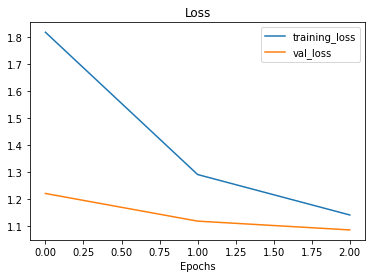

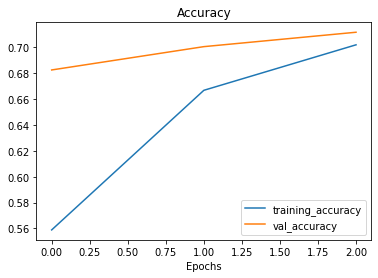

In [38]:
from helper_functions import *
plot_loss_curves(history_101_food_classes_feature_extract)

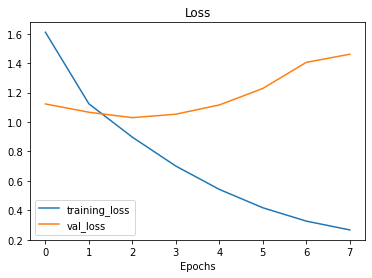

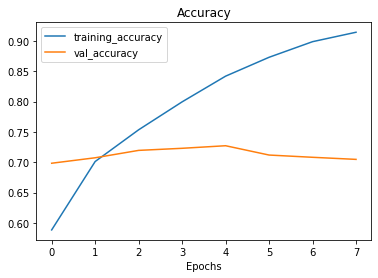

In [39]:
# Plot loss curves
plot_loss_curves(history_101_food_classes_fine_tune_1)

In [40]:
# Create data augmentation layer to incorporate it right into model
data_augmentation = tf.keras.models.Sequential([
                    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
                    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
], name="data_augmentation")

In [46]:
# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [47]:
history_101_food_classes_lower_lr_data_aug = model.fit( train_data,
                                                        epochs=10,
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15*len(test_data)),
                                                        initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                                        callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                                          experiment_name="efficientnetb0_101_classes_all_data_fine_tune_1"),
                                                                   model_checkpoint,
                                                                   tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                                                                    patience=3,
                                                                                                    restore_best_weights=True,
                                                                                                    verbose=1)]
                                                      )

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_fine_tune_1/20220217-090352
Epoch 3/10
2368/2368 [==============================] - 120s 48ms/step - loss: 2.0155 - accuracy: 0.5025 - val_loss: 1.3409 - val_accuracy: 0.6374
Epoch 4/10
2368/2368 [==============================] - 115s 48ms/step - loss: 1.5796 - accuracy: 0.5937 - val_loss: 1.2705 - val_accuracy: 0.6581
Epoch 5/10
2368/2368 [==============================] - 114s 48ms/step - loss: 1.4567 - accuracy: 0.6189 - val_loss: 1.2198 - val_accuracy: 0.6785
Epoch 6/10
2368/2368 [==============================] - 114s 48ms/step - loss: 1.3744 - accuracy: 0.6363 - val_loss: 1.1986 - val_accuracy: 0.6782
Epoch 7/10
2368/2368 [==============================] - 115s 48ms/step - loss: 1.2931 - accuracy: 0.6560 - val_loss: 1.2022 - val_accuracy: 0.6713
Epoch 8/10
2368/2368 [==============================] - 113s 47ms/step - loss: 1.2340 - accuracy: 0.6681 - val_loss: 1.1960 - val_accuracy: 0.6814
Epoch 9

In [48]:
# Evaluate the model
results_lower_lr_data_aug = model.evaluate(test_data)
results_lower_lr_data_aug

790/790 [==============================] - 26s 32ms/step - loss: 1.1779 - accuracy: 0.6834


[1.177926778793335, 0.6833663582801819]

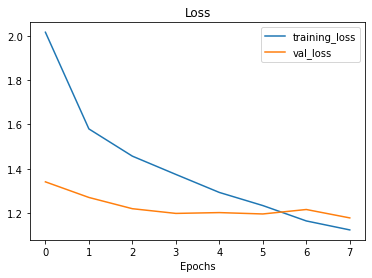

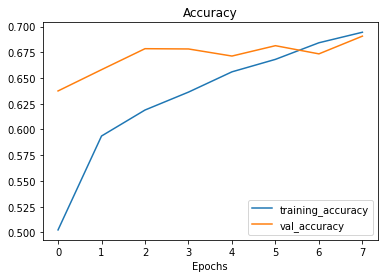

In [49]:
plot_loss_curves(history_101_food_classes_lower_lr_data_aug)

In [54]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

In [58]:
base_model.trainable=True

In [62]:
# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [63]:
history_fine_tune_2 = model.fit(train_data,
                                epochs=100,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=int(0.15*len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                       experiment_name="efficientnetb0_fine_tuned_2"),
                                           model_checkpoint,
                                           early_stopping,
                                           reduce_lr]
                                )

Saving TensorBoard log files to: training_logs/efficientnetb0_fine_tuned_2/20220217-100227
Epoch 1/100
2368/2368 [==============================] - 405s 165ms/step - loss: 1.7581 - accuracy: 0.5603 - val_loss: 1.0010 - val_accuracy: 0.7156 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 390s 164ms/step - loss: 0.9026 - accuracy: 0.7562 - val_loss: 0.8426 - val_accuracy: 0.7603 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 391s 165ms/step - loss: 0.5905 - accuracy: 0.8331 - val_loss: 0.8072 - val_accuracy: 0.7844 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 392s 165ms/step - loss: 0.3589 - accuracy: 0.8958 - val_loss: 0.9176 - val_accuracy: 0.7677 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9370
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 391s 165ms/step - loss: 

In [64]:
results_fine_tune_2 = model.evaluate(test_data)
results_fine_tune_2

790/790 [==============================] - 26s 33ms/step - loss: 1.1696 - accuracy: 0.7918


[1.1695762872695923, 0.7917623519897461]

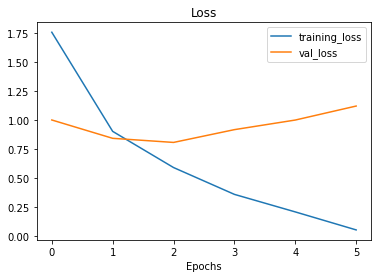

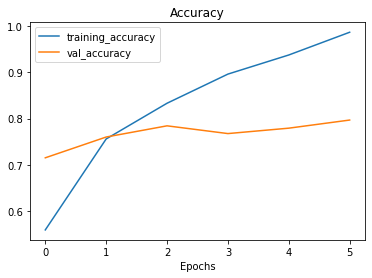

In [65]:
plot_loss_curves(history_fine_tune_2)

In [66]:
# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model_2 = tf.keras.Model(inputs, outputs)
# Compile the model
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [67]:
history_fine_tune_3 = model_2.fit(train_data,
                                  epochs=100,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=int(0.15*len(test_data)),
                                  callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                        experiment_name="efficientnetb0_fine_tuned_3"),
                                            model_checkpoint,
                                            early_stopping,
                                            reduce_lr]
                                  )

Saving TensorBoard log files to: training_logs/efficientnetb0_fine_tuned_3/20220217-111821
Epoch 1/100
2368/2368 [==============================] - 889s 369ms/step - loss: 1.9583 - accuracy: 0.5228 - val_loss: 1.0342 - val_accuracy: 0.7145 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 510s 215ms/step - loss: 0.9928 - accuracy: 0.7287 - val_loss: 1.1221 - val_accuracy: 0.6970 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 445s 187ms/step - loss: 0.8184 - accuracy: 0.7708 - val_loss: 0.9443 - val_accuracy: 0.7426 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 421s 177ms/step - loss: 0.7088 - accuracy: 0.7965 - val_loss: 0.8893 - val_accuracy: 0.7617 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 413s 174ms/step - loss: 0.6132 - accuracy: 0.8224 - val_loss: 0.9091 - val_accuracy: 0.7579 - lr: 1.0000e-04
Epoch 6/100
2368/2368 [==============================] - ETA: 0s - loss: 0.5458

In [68]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetV2L(include_top=False)
base_model.trainable = True

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model_3 = tf.keras.Model(inputs, outputs)

# Compile the model
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

473186304/473176280 [==============================] - 3s 0us/step


In [69]:
history_fine_tune_4 = model_3.fit(train_data,
                                  epochs=100,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=int(0.15*len(test_data)),
                                  callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                        experiment_name="efficientnetb0_fine_tuned_4"),
                                            model_checkpoint,
                                            early_stopping,
                                            reduce_lr]
                                  )

Saving TensorBoard log files to: training_logs/efficientnetb0_fine_tuned_4/20220217-121650
Epoch 1/100
2368/2368 [==============================] - 2080s 853ms/step - loss: 1.2748 - accuracy: 0.6705 - val_loss: 0.6424 - val_accuracy: 0.8255 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 2015s 850ms/step - loss: 0.5477 - accuracy: 0.8474 - val_loss: 0.6517 - val_accuracy: 0.8149 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.9068
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 2014s 850ms/step - loss: 0.3133 - accuracy: 0.9068 - val_loss: 0.6739 - val_accuracy: 0.8220 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 2016s 851ms/step - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.5647 - val_accuracy: 0.8753 - lr: 2.0000e-05
Epoch 5/100
2368/2368 [==============================] - 2016s 851ms/step - l

In [70]:
results_fine_tune_4 = model_3.evaluate(test_data)
results_fine_tune_4

790/790 [==============================] - 170s 215ms/step - loss: 0.6909 - accuracy: 0.8772


[0.6909435987472534, 0.8771881461143494]

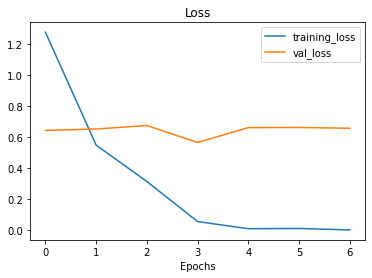

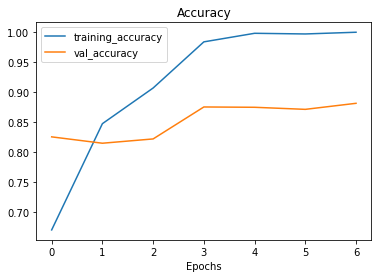

In [71]:
plot_loss_curves(history_fine_tune_4)

In [73]:
model_3.save("food101_beaten_88_percent_accuracy")

INFO:tensorflow:Assets written to: food101_beaten_88_percent_accuracy/assets


INFO:tensorflow:Assets written to: food101_beaten_88_percent_accuracy/assets


In [ ]:
loaded_model = tf.keras.models.load_model("drive/MyDrive/food101_beaten_88_percent_accuracy")
loaded_model.evaluate(test_data)